In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join

In [2]:
img_width = 200
img_height = 200
#Calling Images from Different Train and Validation
train_data_dir = "C:/Users/kbije/OneDrive/Desktop/OMS/OMS New/BigData Project/Final Thermal Project/updated new dataset/Train"
validation_data_dir ="C:/Users/kbije/OneDrive/Desktop/OMS/OMS New/BigData Project/Final Thermal Project/updated new dataset/Validation"
train_samples = 400
validation_samples = 120
epochs = 20
batch_size = 40

In [3]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [4]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 198, 198, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 97, 97, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        1

In [6]:
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label = label_img(img)
        path = os.path.join(TRAIN_DIR, img)
        img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE),(IMG_SIZE,IMG_SIZE))
        training_data.append([np.array(img), np.array(label)])
    shuffle(traning_data)
    np.save('train_data.npy', traning_data)
    return training__data

In [7]:
import tensorflow.keras
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy', 
              optimizer=tensorflow.keras.optimizers.Adam(lr=.0001),
              metrics=['accuracy'])

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [9]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 408 images belonging to 4 classes.


In [10]:
print(train_generator.class_indices)

{'A': 0, 'B': 1, 'C': 2, 'D': 3}


In [11]:
imgs, labels = next(train_generator)

In [12]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

40
[1. 0. 0. 0.]


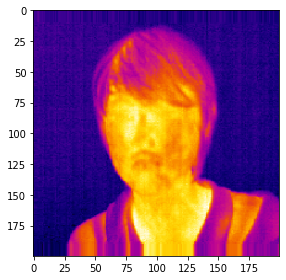

[0. 0. 1. 0.]


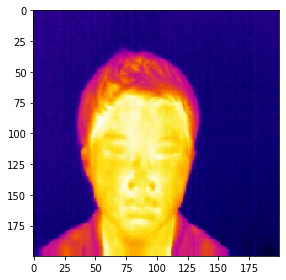

[1. 0. 0. 0.]


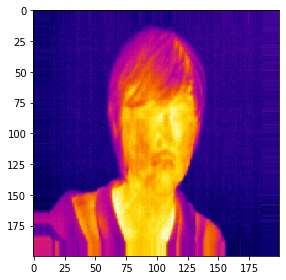

[1. 0. 0. 0.]


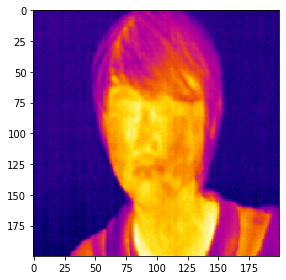

[0. 0. 0. 1.]


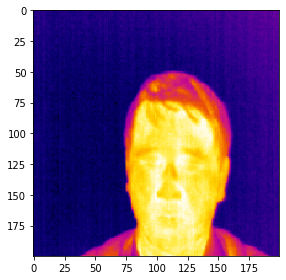

[0. 1. 0. 0.]


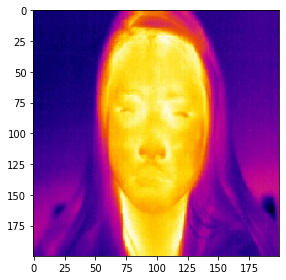

[0. 1. 0. 0.]


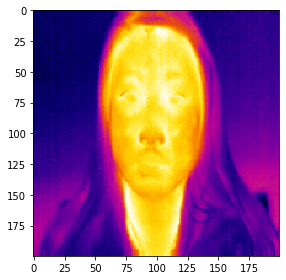

[1. 0. 0. 0.]


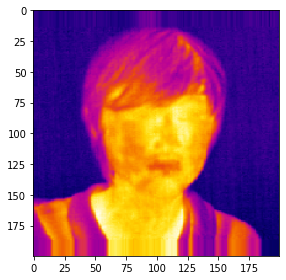

[0. 0. 1. 0.]


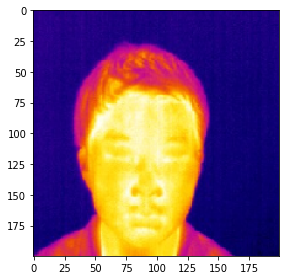

[1. 0. 0. 0.]


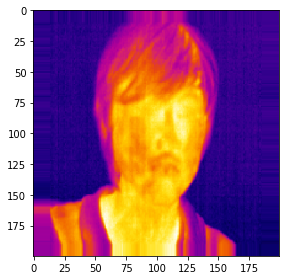

[0. 1. 0. 0.]


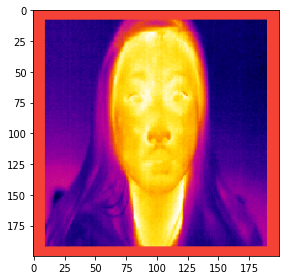

[0. 1. 0. 0.]


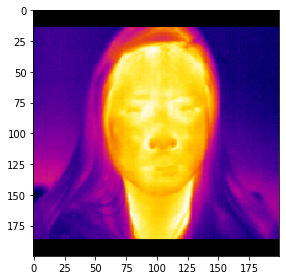

[0. 1. 0. 0.]


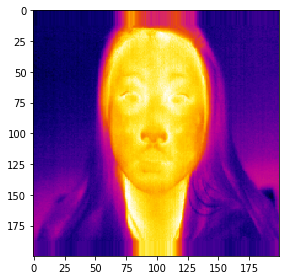

[0. 1. 0. 0.]


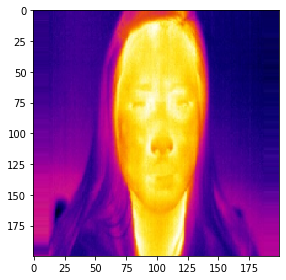

[1. 0. 0. 0.]


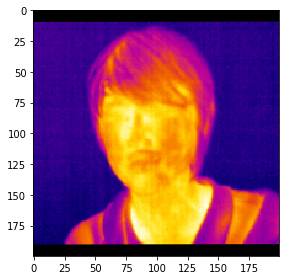

[0. 0. 0. 1.]


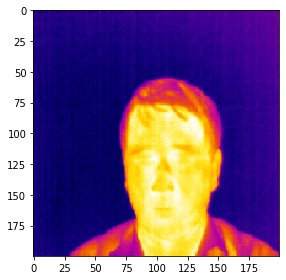

[0. 0. 1. 0.]


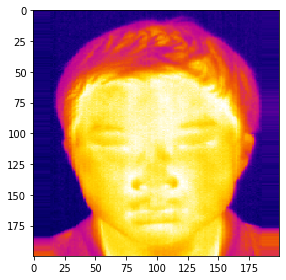

[0. 1. 0. 0.]


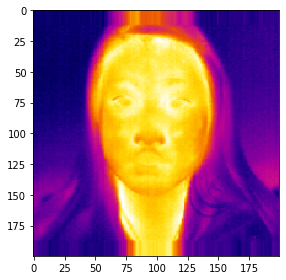

[0. 1. 0. 0.]


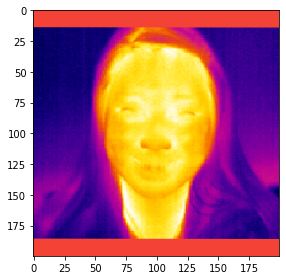

[0. 0. 0. 1.]


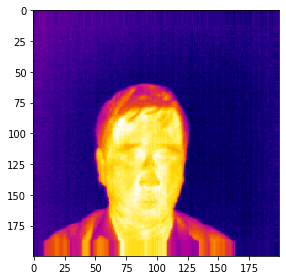

[0. 0. 0. 1.]


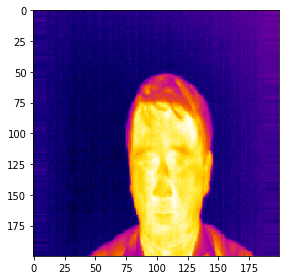

[1. 0. 0. 0.]


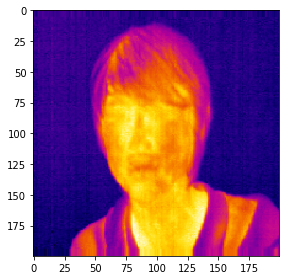

[0. 1. 0. 0.]


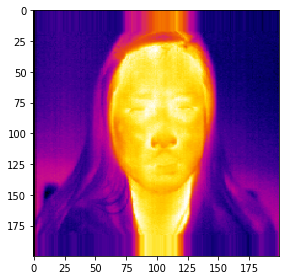

[0. 0. 0. 1.]


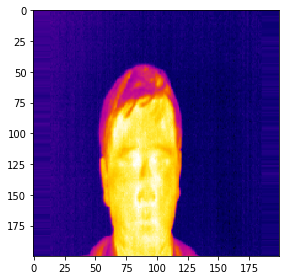

[1. 0. 0. 0.]


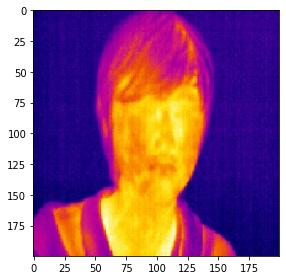

[1. 0. 0. 0.]


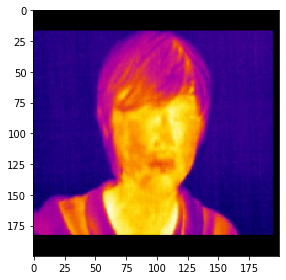

[1. 0. 0. 0.]


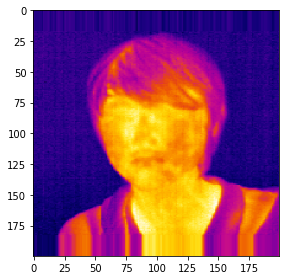

[0. 0. 1. 0.]


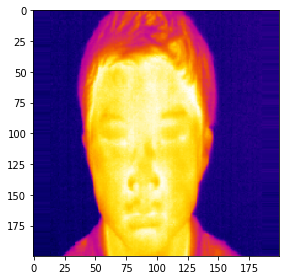

[0. 0. 0. 1.]


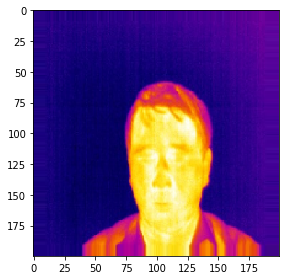

[0. 1. 0. 0.]


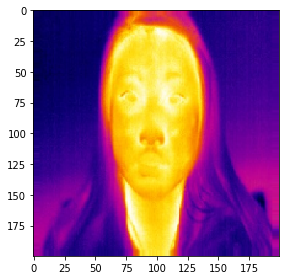

[0. 0. 0. 1.]


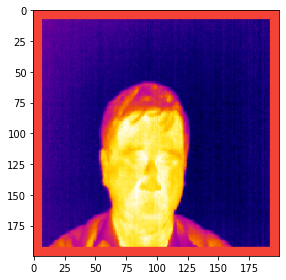

[0. 1. 0. 0.]


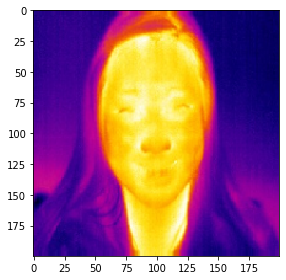

[0. 0. 1. 0.]


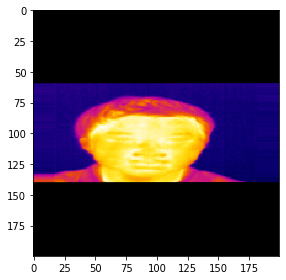

[0. 1. 0. 0.]


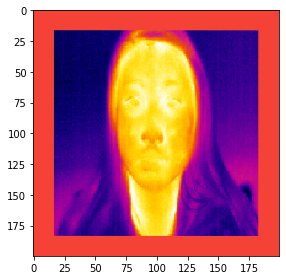

[0. 1. 0. 0.]


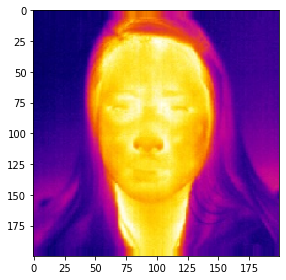

[1. 0. 0. 0.]


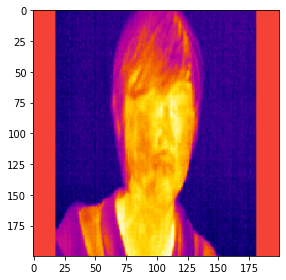

[0. 1. 0. 0.]


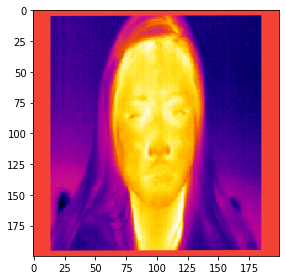

[0. 0. 1. 0.]


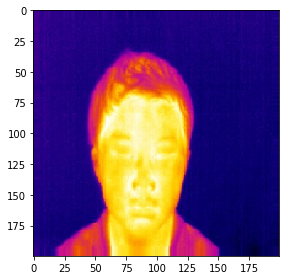

[0. 0. 1. 0.]


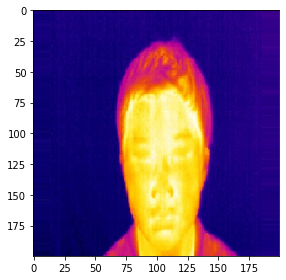

[0. 0. 1. 0.]


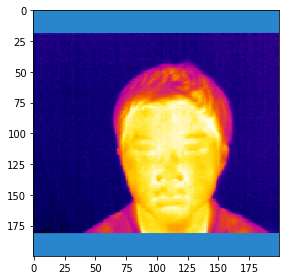

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
image_batch,label_batch = train_generator.next()

print(len(image_batch))
for i in range(0,len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

In [14]:
validation_generator = train_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 162 images belonging to 4 classes.


In [15]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_samples // batch_size)

c:\python36\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
10/10 [==============================] - 70s 5s/step - loss: 1.3402 - accuracy: 0.3854 - val_loss: 1.1766 - val_accuracy: 0.7667
Epoch 2/20
10/10 [==============================] - 29s 3s/step - loss: 1.1379 - accuracy: 0.6619 - val_loss: 0.9098 - val_accuracy: 0.7000
Epoch 3/20
10/10 [==============================] - 26s 3s/step - loss: 0.9348 - accuracy: 0.6706 - val_loss: 0.6210 - val_accuracy: 0.9917
Epoch 4/20
10/10 [==============================] - 33s 3s/step - loss: 0.6316 - accuracy: 0.8611 - val_loss: 0.3521 - val_accuracy: 1.0000
Epoch 5/20
10/10 [==============================] - 27s 3s/step - loss: 0.4256 - accuracy: 0.9141 - val_loss: 0.2581 - val_accuracy: 0.9917
Epoch 6/20
10/10 [==============================] - 24s 2s/step - loss: 0.3495 - accuracy: 0.9262 - val_loss: 0.1420 - val_accuracy: 1.0000
Epoch 7/20
10/10 [==============================] - 24s 3s/step - loss: 0.2414 - accuracy: 0.9188 - val_loss: 0.1062 - val_accuracy: 1.0000
Epoch 8/20
10/10 [==

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


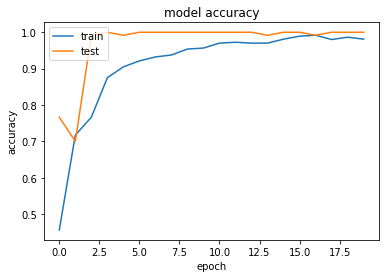

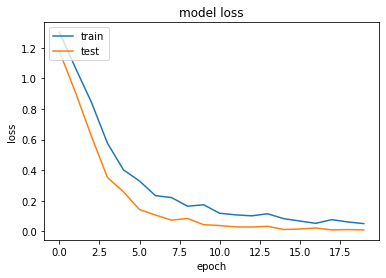

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("./Output1_Kaggle_Updated_2")
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("./Output2_Kaggle_Updated_2")
plt.show()

In [18]:
predict_dir_path="C:/Users/kbije/OneDrive/Desktop/OMS/OMS New/BigData Project/Final Thermal Project/updated new dataset/Test"
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)

['A_U08153239.bmp', 'A_U08154251.bmp', 'B_U02112228.bmp', 'B_U02122613.bmp', 'C_U02210914.bmp', 'C_U02210925.bmp', 'D_U01164123.bmp', 'D_U01164135.bmp']


In [24]:
# predicting images
from tensorflow.keras.preprocessing import image
A = 0
B = 0
C = 0
D = 0

actual  = [0,0,1,1,2,2,3,3]
predicted  = []

for file in onlyfiles:
    img = image.load_img(predict_dir_path+'/'+file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    classes = np.argmax(classes, axis=1)
    print(classes)
    
    if classes == 0:
        print(file + ": " + 'A')
        A += 1
        predicted.append(0)
    elif classes == 1:
        print(file + ": " + 'B')
        B += 1
        predicted.append(1)
    elif classes == 2:
        print(file + ": " + 'C')
        C += 1
        predicted.append(2)
    else :
        print(file + ": " + 'D')
        D += 1
        predicted.append(3)
print("Total A Images :",A)
print("Total B Images :",B)
print("Total C Images :",C)
print("Total D Images :",D)

print("actual :",actual)
print("predicted :",predicted)

[0]
A_U08153239.bmp: A
[0]
A_U08154251.bmp: A
[1]
B_U02112228.bmp: B
[1]
B_U02122613.bmp: B
[2]
C_U02210914.bmp: C
[2]
C_U02210925.bmp: C
[3]
D_U01164123.bmp: D
[3]
D_U01164135.bmp: D
Total A Images : 2
Total B Images : 2
Total C Images : 2
Total D Images : 2
actual : [0, 0, 1, 1, 2, 2, 3, 3]
predicted : [0, 0, 1, 1, 2, 2, 3, 3]


In [25]:
print(actual)
print(predicted)

[0, 0, 1, 1, 2, 2, 3, 3]
[0, 0, 1, 1, 2, 2, 3, 3]


In [26]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(actual,predicted, labels= [0,1,2,3])
print('Confusion Matrix : \n',matrix)

Confusion Matrix : 
 [[2 0 0 0]
 [0 2 0 0]
 [0 0 2 0]
 [0 0 0 2]]


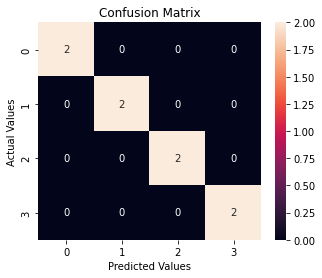

In [27]:
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(matrix, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [30]:
import os.path
if os.path.isfile('models/Classification_Updated_Model.h5') is False:
    model.save('models/Classification_Updated_Model.h5')

In [31]:
from tensorflow.keras.models import load_model
new_model = load_model('models/Classification_Updated_Model.h5')